In [2]:

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
ratings = pd.read_csv("data/amazon/instant_video_ratings.csv")


In [4]:
#How many items are in the data set? How many users? How many ratings?

#How many items are in the data set? How many users? How many ratings?

n_ratings = len(ratings)
n_users = ratings['user'].nunique()
n_items = ratings['item'].nunique()

print(f'Number of ratings: {n_ratings}')
print(f'Number of unique users: {n_users}')
print(f'Number of unique items: {n_items}')


Number of ratings: 37126
Number of unique users: 5130
Number of unique items: 1685


In [5]:
#User activity:
#What is the distribution of ratings-per-user?

user_freq = ratings[['user', 'rating']].groupby('user').count().reset_index()
user_freq.columns = ['user', 'n_ratings']
user_freq.head()

,user,n_ratings
0,A0705654XT5UCAYOY7TH,8
1,A099898949AFPOGMFDCB,7
2,A1004HZ4AR10UI,6
3,A10072IQFY9167,5
4,A100UD67AHFODS,5


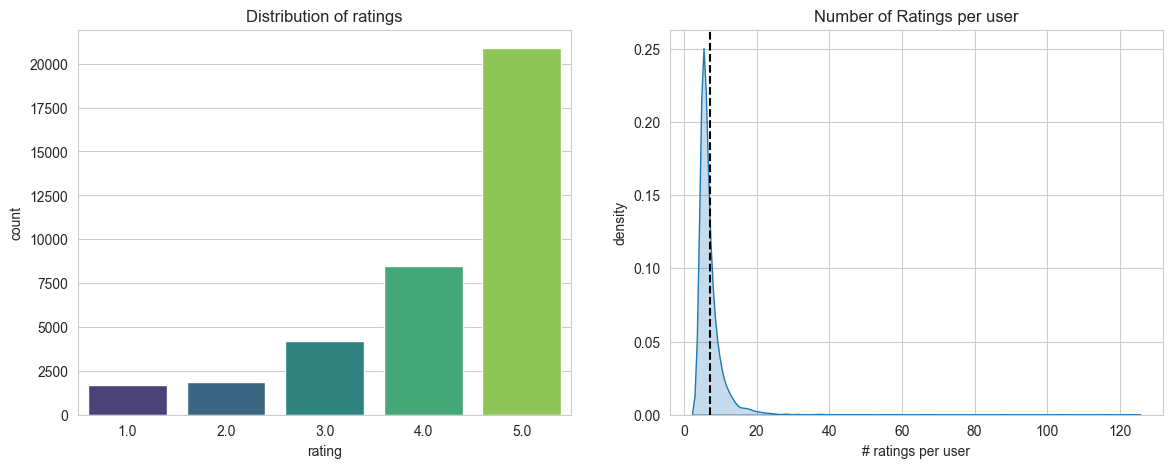

In [6]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of ratings")

plt.subplot(1,2,2)
ax = sns.kdeplot(user_freq['n_ratings'], fill=True, legend=False)
plt.axvline(user_freq['n_ratings'].mean(), color="k", linestyle="--")
plt.xlabel("# ratings per user")
plt.ylabel("density")
plt.title("Number of Ratings per user")
plt.show()

In [7]:
#Find most and least active users for all 4 dataset. How many ratings did they provide.

user_active = ratings.groupby('user')['rating'].count()

most_active = user_active.idxmax()
least_active = user_active.idxmin()

most_active_ratings = user_active[most_active]
least_active_ratings = user_active[least_active]

print(f"The most active user is {most_active} with {most_active_ratings} ratings.")
print(f"The least active user is {least_active} with {least_active_ratings} ratings.")


The most active user is AV6QDP8Q0ONK4 with 123 ratings.
The least active user is A10072IQFY9167 with 5 ratings.


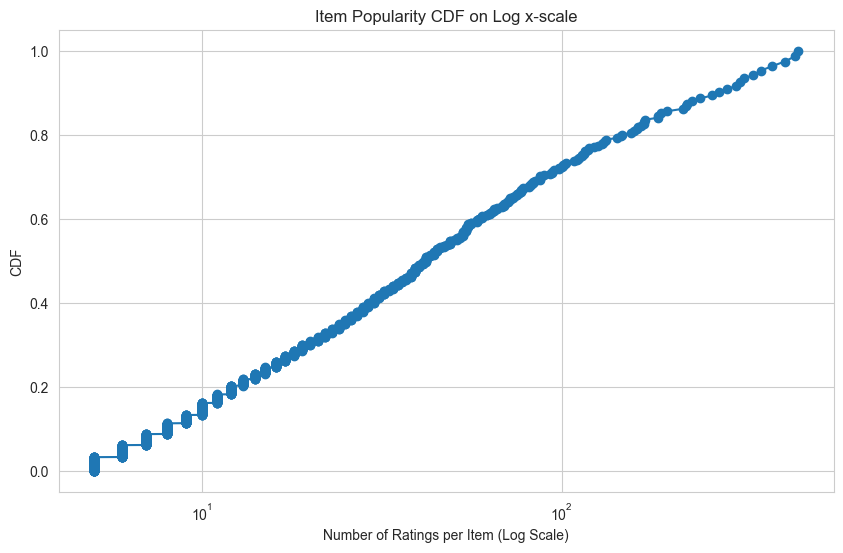

In [8]:
#Item statistics:
#What is the item popularity curve (the distribution of ratings-per-item)? A CDF plot on a log x scale or a rank-frequency plot on a log-log scale.

item_freq = ratings.groupby('item')['rating'].count().reset_index()
item_freq.columns = ['item', 'n_ratings']

item_freq_sort = item_freq.sort_values(by='n_ratings')

cdf = np.cumsum(item_freq_sort['n_ratings']) / np.sum(item_freq_sort['n_ratings'])

plt.figure(figsize=(10, 6))
plt.plot(item_freq_sort['n_ratings'], cdf, marker='o')
plt.xscale('log')
plt.xlabel('Number of Ratings per Item (Log Scale)')
plt.ylabel('CDF')
plt.title('Item Popularity CDF on Log x-scale')
plt.show()


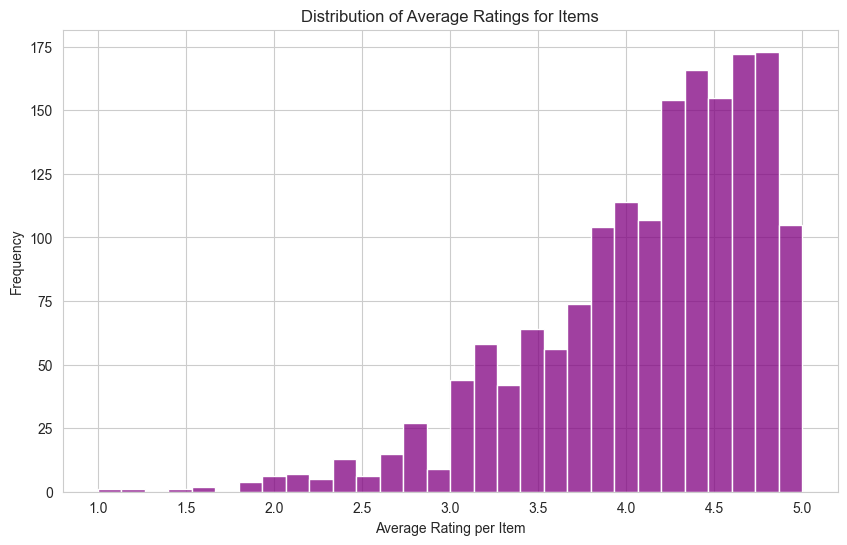

In [9]:
#What is the distribution of average ratings for items?

avg_item_rating = ratings.groupby('item')['rating'].mean().reset_index()
avg_item_rating.columns = ['item', 'avg_rating']

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(avg_item_rating['avg_rating'], bins=30, kde=False, color='purple')
plt.xlabel('Average Rating per Item')
plt.ylabel('Frequency')
plt.title("Distribution of Average Ratings for Items")
plt.show()


In [10]:
#Non-personalized recommendation
#What are the 10 most popular items (the items with the most ratings)? Show the item ID, item title, and the number of ratings.

item_pop = ratings.groupby('item')['rating'].count().reset_index()
item_pop.columns = ['item', 'n_ratings']

top10_item = item_pop.sort_values(by='n_ratings', ascending=False).head(10)

print('The most popular items based on the number of ratings are: \n')
print(top10_item[['item', 'n_ratings']])


The most popular items based on the number of ratings are: 

            item  n_ratings
1557  B00I3MPDP4        455
1257  B00DAHSVYC        444
1549  B00I3MMN4I        417
1001  B00APE00H4        384
1184  B00CDBTQCW        358
1555  B00I3MNGCG        341
1556  B00I3MNVBW        322
1057  B00B8P8O9K        313
1551  B00I3MMTS8        306
1183  B00CDBR1P6        288


In [11]:
#What are the 10 items with the highest average ratings (with their titles and average ratings)?

item_avg_rating = ratings.groupby('item')['rating'].mean().reset_index()
item_avg_rating.columns = ['item', 'avg_rating']

top10_avg_rate = item_avg_rating.sort_values(by='avg_rating', ascending=False).head(10)

print('The 10 items with the highest average ratings are: \n')
print(top10_avg_rate)


The 10 items with the highest average ratings are: 

            item  avg_rating
959   B00A1ZV2KG         5.0
1247  B00D6MQ6ZM         5.0
1268  B00DI2NTK0         5.0
258   B00332YHLU         5.0
462   B004SKQHYQ         5.0
878   B009DNVLH6         5.0
259   B003336P1Y         5.0
1031  B00B09HOGI         5.0
914   B009KZYJ62         5.0
415   B004E2BY8W         5.0


In [12]:
#What are the 10 movies with the highest damped average ratings, with a Bayesian damping factor of 5? Show both the damped and undamped mean for these items. You can also use the bias model (without user biases) to compute these means. The damped mean with factor 
 #is computed by: $r^~i=\frac{\Sum{r_{ui}\in R_i}r_{ui}}+\gamma*r^¯)}{|R_i|+ \gamma}$ .
    
        
overall_mean_rating = ratings['rating'].mean()
gamma = 5

item_stats = ratings.groupby('item')['rating'].agg(['sum', 'count']).reset_index()
item_stats['damped_mean'] = (item_stats['sum'] + gamma * overall_mean_rating) / (item_stats['count'] + gamma)
item_stats['undamped_mean'] = item_stats['sum'] / item_stats['count']

top10_damped_items = item_stats.sort_values(by='damped_mean', ascending=False).head(10)

print('The 10 items with the highest damped average ratings are: \n')
print(top10_damped_items[['item', 'damped_mean', 'undamped_mean']])
    
    

The 10 items with the highest damped average ratings are: 

            item  damped_mean  undamped_mean
264   B00366JI9O     4.852734       4.918367
265   B0036D8LPO     4.847376       4.941176
1291  B00DTOYIIE     4.821133       4.836735
402   B004BHISOI     4.820348       5.000000
190   B002A493NY     4.801191       4.885714
268   B0036DCJKW     4.796891       4.863636
1388  B00F3KFFPM     4.795483       4.835616
1529  B00HQQOLSS     4.784680       4.944444
401   B004BHGDYK     4.780425       5.000000
1190  B00CE10BD4     4.773810       4.846154
